# Get truth from cosmoDC2

In [1]:
%matplotlib inline

import os

import numpy as np
import matplotlib.pyplot as plt

In [2]:
base_dir="/global/cfs/cdirs/lsst/shared/DC2-prod/Run2.2i/truth/galtruth"

In [3]:
import os,re

In [4]:
the_list_of_files=os.listdir(base_dir)

In [5]:
the_list_of_files[:10]

['truth_summary_hp9304.sqlite3',
 'truth_summary_hp10194.sqlite3',
 'truth_summary_hp9945.parquet',
 'truth_summary_hp9939.parquet',
 'truth_summary_hp9944.sqlite3',
 'truth_summary_hp9425.parquet',
 'truth_summary_hp9306.sqlite3',
 'truth_summary_hp10071.parquet',
 'truth_summary_hp9304.parquet',
 'truth_summary_hp9937.parquet']

In [7]:
selected_files=[]
for filename in the_list_of_files:
    sel_filename=re.findall("^truth_summary_hp[0-9][0-9][0-9][0-9].parquet$",filename)
    if len(sel_filename) > 0:
        selected_files.append(sel_filename[0])

In [16]:
len(selected_files)

94

In [8]:
selected_files=sorted(selected_files)

In [9]:
selected_files[:20]

['truth_summary_hp8786.parquet',
 'truth_summary_hp8787.parquet',
 'truth_summary_hp8788.parquet',
 'truth_summary_hp8789.parquet',
 'truth_summary_hp8790.parquet',
 'truth_summary_hp8791.parquet',
 'truth_summary_hp8792.parquet',
 'truth_summary_hp8793.parquet',
 'truth_summary_hp8794.parquet',
 'truth_summary_hp8913.parquet',
 'truth_summary_hp8914.parquet',
 'truth_summary_hp8915.parquet',
 'truth_summary_hp8916.parquet',
 'truth_summary_hp8917.parquet',
 'truth_summary_hp8918.parquet',
 'truth_summary_hp8919.parquet',
 'truth_summary_hp8920.parquet',
 'truth_summary_hp8921.parquet',
 'truth_summary_hp9042.parquet',
 'truth_summary_hp9043.parquet']

In [10]:
from pyspark.sql import SparkSession

# Initialise our Spark session
spark = SparkSession.builder.getOrCreate()


In [11]:
InputPath = [base_dir + "/{}".format(filename) for filename in selected_files[:1]]

In [12]:
InputPath

['/global/cfs/cdirs/lsst/shared/DC2-prod/Run2.2i/truth/galtruth/truth_summary_hp8786.parquet']

In [13]:
df = spark.read.parquet(*InputPath)

In [14]:
df = df.repartition(df.rdd.getNumPartitions())

In [15]:
# Check what we have in the file
df.printSchema()

root
 |-- id: long (nullable = true)
 |-- host_galaxy: long (nullable = true)
 |-- ra: double (nullable = true)
 |-- dec: double (nullable = true)
 |-- redshift: float (nullable = true)
 |-- is_variable: integer (nullable = true)
 |-- is_pointsource: integer (nullable = true)
 |-- flux_u: float (nullable = true)
 |-- flux_g: float (nullable = true)
 |-- flux_r: float (nullable = true)
 |-- flux_i: float (nullable = true)
 |-- flux_z: float (nullable = true)
 |-- flux_y: float (nullable = true)
 |-- flux_u_noMW: float (nullable = true)
 |-- flux_g_noMW: float (nullable = true)
 |-- flux_r_noMW: float (nullable = true)
 |-- flux_i_noMW: float (nullable = true)
 |-- flux_z_noMW: float (nullable = true)
 |-- flux_y_noMW: float (nullable = true)



In [17]:
data = df.select('ra', 'dec').collect()

In [19]:
#data.describe().show()

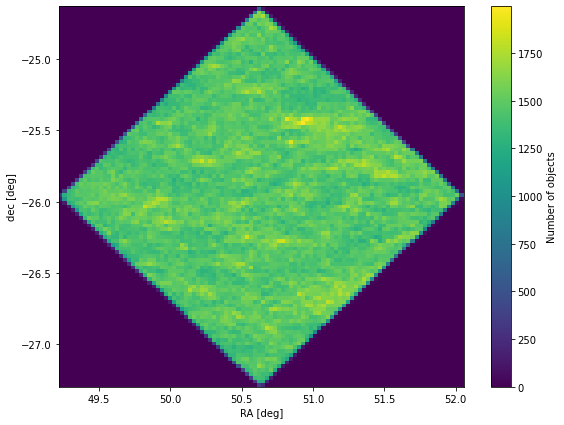

In [20]:
# `collect` returns list of list[ra, dec], so for 
# plotting purpose we tranpose the output:
ra, dec = np.transpose(data)

# Plot a 2d histogram of sources
plt.figure(figsize=(10,7))
plt.hist2d(ra, dec, 100)
plt.gca().set_aspect('equal')
plt.colorbar(label='Number of objects')
plt.xlabel('RA [deg]')
plt.ylabel('dec [deg]');

In [22]:
base_dir2="/global/cfs/cdirs/lsst/shared/xgal/cosmoDC2/cosmoDC2_v1.1.4_rs_scatter_query_tree_double"

In [23]:
the_list_of_files2=os.listdir(base_dir2)

In [24]:
first_file="z_0_1.step_all.healpix_10066.hdf5"

In [25]:
full_file=os.path.join(base_dir2,first_file)

In [31]:
#df=spark.read.hdf5(full_file)
df=spark.read.option("extension", "hdf5").option("recursion", "false").hdf5(base_dir2, "z_0_1.step_all.healpix_10066")


AttributeError: 'DataFrameReader' object has no attribute 'hdf5'